# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


train_trans= pd.read_csv("train_transaction.csv") 
train_ident = pd.read_csv("train_identity.csv")

In [2]:
print(train_trans.head())
print(len(train_trans))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [3]:
print(train_ident.head())
print(len(train_ident))

   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                  

In [73]:
# Outer join on TransactionID
merged_required = pd.merge(train_trans, train_ident, on='TransactionID', how='outer')

In [74]:
print(merged_required.head())
print(merged_required.shape)

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   Na

In [75]:
isFradTrans = merged_required[merged_required['isFraud'] == 1]
nonFraudTrans = merged_required[merged_required['isFraud'] == 0]

isFradTrans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN


0    569877
1     20663
Name: isFraud, dtype: int64

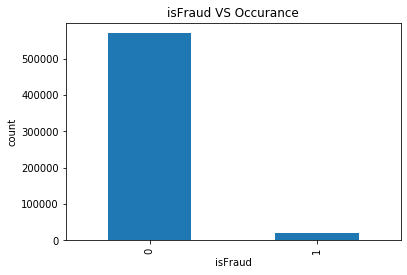

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
merged_required['isFraud'].value_counts().plot(kind='bar')
plt.xlabel('isFraud')
plt.ylabel('count')
plt.title('isFraud VS Occurance')
merged_required['isFraud'].value_counts()

Most of the transactions are Non-Fraud. Almost 97% of transactions are Non-Fraud and remaining 3% are Fraud transactions.

Text(0.5, 1.0, 'ProductCD for Fraud Vs Non-Fraud transactions')

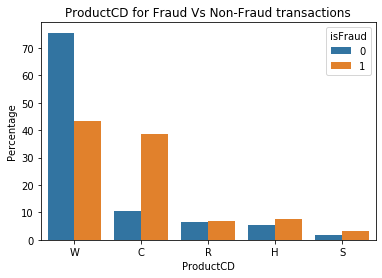

In [77]:
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

merge_plot = (merged_required["ProductCD"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="ProductCD", y="Percentage", hue="isFraud", data=merge_plot)
plt.title('ProductCD for Fraud Vs Non-Fraud transactions')

The above graph for ProductCD is plotted based on percentage of relative frequency. Although there're  more fraud transactions for ProductCD 'W', from the graph we can observe that for Product Label 'C', there're more fraud transactions(40%) compared to Non-Fraud (10%).

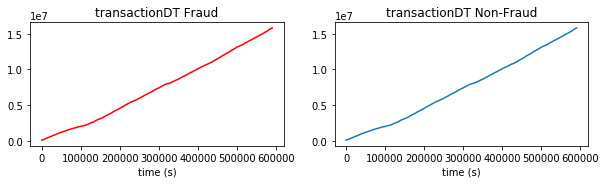

In [78]:
# plot for transactionDT for Fraud Vs Non-Fraud
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(isFradTrans['TransactionDT'], 'r-')
plt.xlabel('time (s)')
plt.title('transactionDT Fraud')
plt.subplot(2,2,2)
plt.title('transactionDT Non-Fraud')
plt.plot(nonFraudTrans['TransactionDT'])
plt.xlabel('time (s)')
plt.show()

Text(0.5, 1.0, 'Card category for Fraud Vs Non-Fraud transactions')

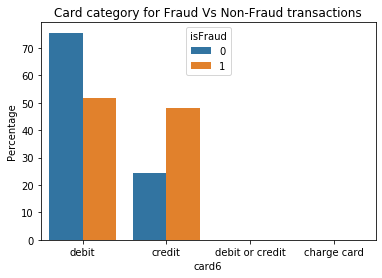

In [79]:
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html
merge_plot = (merged_required["card6"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="card6", y="Percentage", hue="isFraud", data=merge_plot)

plt.title('Card category for Fraud Vs Non-Fraud transactions')

The above graph for card6 is plotted based on percentage of relative frequency. Although there're more fraud transactions for debit card, comparing to total number of people who use credit card we can consider that there're more fraud transactions happening in credit card.

Text(0.5, 1.0, 'Card type for Fraud Vs Non-Fraud transactions')

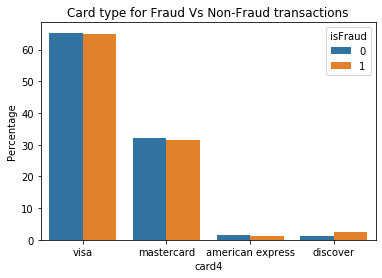

In [80]:
merge_plot = (merged_required["card4"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="card4", y="Percentage", hue="isFraud", data=merge_plot)

plt.title('Card type for Fraud Vs Non-Fraud transactions')

Percentage of fraud transactions (60%) is higher for the transactions payed by Visa card compared to mastercard.

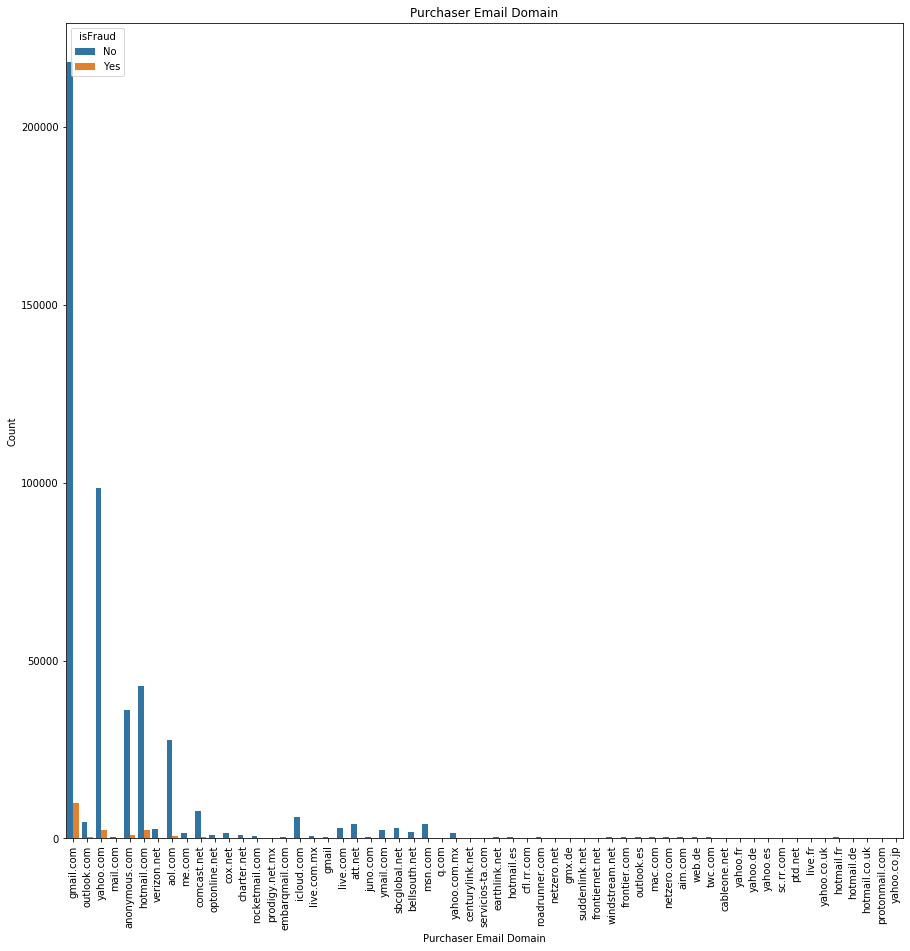

In [81]:
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig = plt.figure(figsize=(15,15))
plot1=sns.countplot(x='P_emaildomain', data=merged_required,hue='isFraud')
plot1.set_title('Purchaser Email Domain')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("Purchaser Email Domain")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

Most of the fraud trasactions for purchaser_email_domain and receiver_email_domain are from gmail.com. There's not much interesting insight in this, as lot of people use gmail.com domain. From the above and below graph we can see that very less percentage of frauds happening comapred to non-fraud transactions for gmail.com domain.

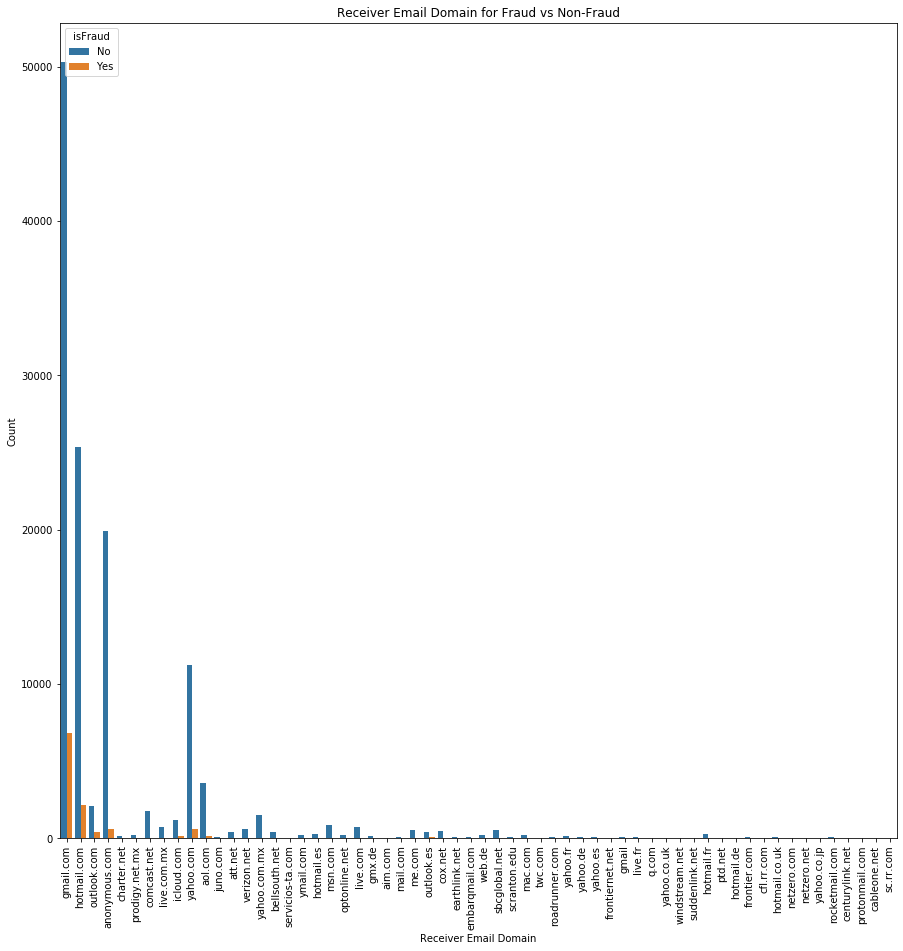

In [82]:
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig = plt.figure(figsize=(15,15))
plot1=sns.countplot(x='R_emaildomain', data=merged_required,hue='isFraud')
plot1.set_title('Receiver Email Domain for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("Receiver Email Domain")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

Text(0.5, 1.0, 'DeviceType for Fraud vs Non-Fraud')

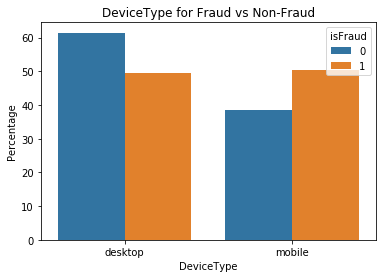

In [83]:
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html
merge_plot = (merged_required["DeviceType"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="DeviceType", y="Percentage", hue="isFraud", data=merge_plot)
plt.title('DeviceType for Fraud vs Non-Fraud')

The above graph for DeviceType is plotted based on percentage of relative frequency. Although there're equal percentage of fraud transactions for both mobile and desktop, comparing to total number of people who use mobile we can consider that there're more fraud transactions happening to the people who use mobile device-type.

Text(0.5, 1.0, 'Transaction Amount for Fraud vs Non-Fraud')

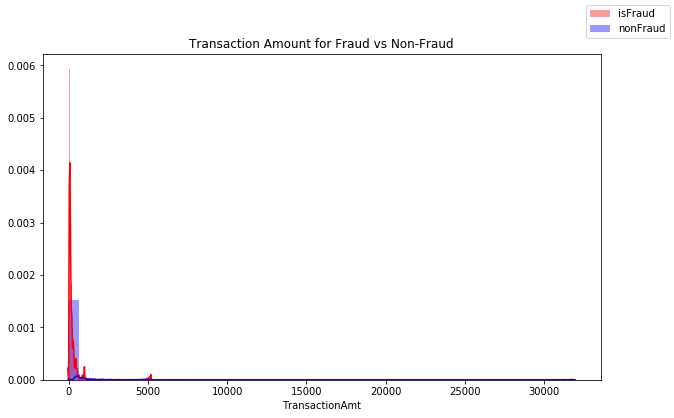

In [84]:
fig = plt.figure(figsize=(10,6))
sns.distplot(isFradTrans["TransactionAmt"] , color="red", label="Fraud")
sns.distplot(nonFraudTrans["TransactionAmt"] , color="blue", label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('Transaction Amount for Fraud vs Non-Fraud')

From the above graph, we can infer that cheap products transactions leads to more fraud. As we can see that most of fraud transactions happened for the transaction amount ranging between $200 - $300

Text(0.5, 1.0, 'log of Transaction Amount for Fraud vs Non-Fraud')

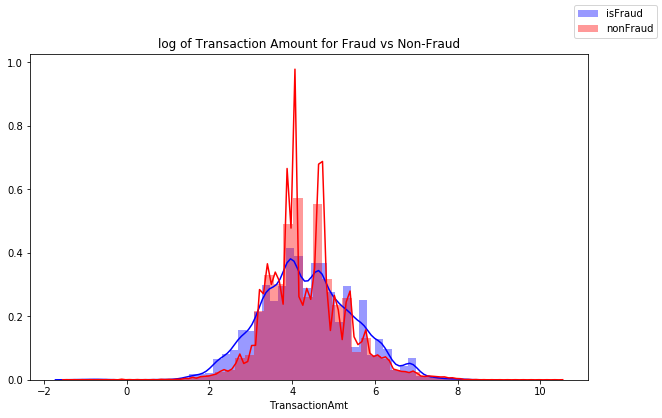

In [85]:
fig = plt.figure(figsize=(10,6))
sns.distplot(np.log(isFradTrans["TransactionAmt"]) , color="blue", label="Fraud")
sns.distplot(np.log(nonFraudTrans["TransactionAmt"]) , color="red", label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('log of Transaction Amount for Fraud vs Non-Fraud')

Text(0.5, 1.0, 'dist1 for Fraud vs Non-Fraud')

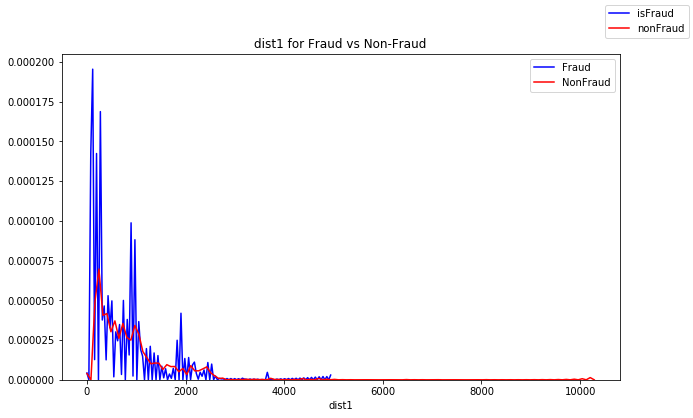

In [99]:
warnings.filterwarnings('ignore')
isFradTrans['dist1'].fillna(np.nanmedian(merged_required['dist1']), inplace=True)
isFradTrans['dist2'].fillna(np.nanmedian(merged_required['dist2']), inplace=True)
nonFraudTrans['dist1'].fillna(np.nanmedian(merged_required['dist1']), inplace=True)
nonFraudTrans['dist2'].fillna(np.nanmedian(merged_required['dist2']), inplace=True)
fig = plt.figure(figsize=(10,6))
sns.distplot(isFradTrans["dist1"] , color="blue", hist= False,label="Fraud")
sns.distplot(nonFraudTrans["dist1"] , color="red", hist=False,label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('dist1 for Fraud vs Non-Fraud')

Text(0.5, 1.0, 'dist2 for Fraud vs Non-Fraud')

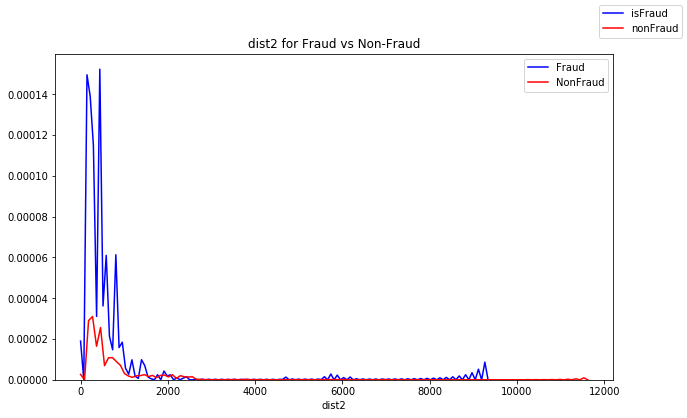

In [100]:
fig = plt.figure(figsize=(10,6))
sns.distplot(isFradTrans["dist2"] , color="blue", hist = False,label="Fraud")
sns.distplot(nonFraudTrans["dist2"] , color="red", hist = False,label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('dist2 for Fraud vs Non-Fraud')

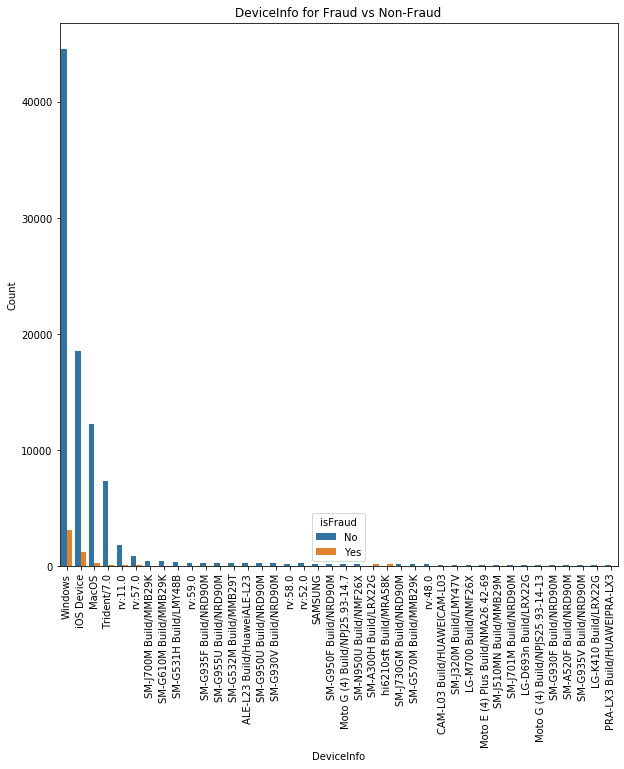

In [91]:
# As the number of labels are large, considering only top 40
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig = plt.figure(figsize=(10,10))
plot1=sns.countplot(x='DeviceInfo', data=merged_required,order = merged_required['DeviceInfo'].value_counts().iloc[:40].index,hue='isFraud')
plot1.set_title('DeviceInfo for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("DeviceInfo")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

There's nothing much interesting about DeviceInfo. But comparitively, there're lot of windows users where fraud transactions are happening.

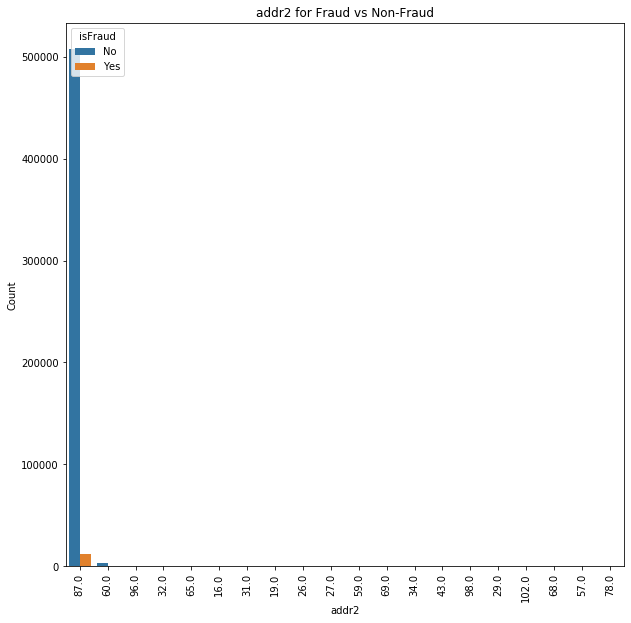

In [92]:
# though this is numerical data, lot of transactions is under 1 country code. So considered countplot for top 20.
fig = plt.figure(figsize=(10,10))
plot1=sns.countplot(x='addr2', data=merged_required,order = merged_required['addr2'].value_counts().iloc[:20].index,hue='isFraud')
plot1.set_title('addr2 for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("addr2")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

Most of the transactions are happening from country code 87. So all the fraud users from country code 87.

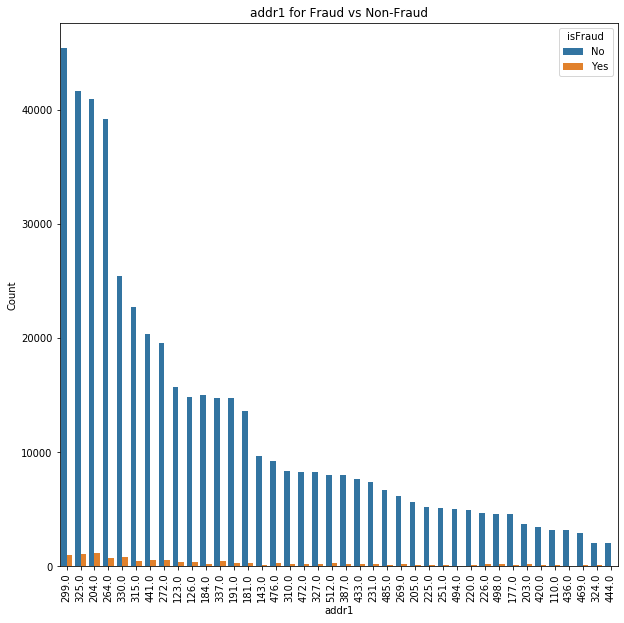

In [93]:
fig = plt.figure(figsize=(10,10))
plot1=sns.countplot(x='addr1', data=merged_required,order = merged_required['addr1'].value_counts().iloc[:40].index,hue='isFraud')
plot1.set_title('addr1 for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("addr1")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

## Part 2 - Transaction Frequency

In [94]:
#Converting TransactionDT to timestamp. (Day, Hour)

merged_required['day'] = pd.to_datetime(merged_required['TransactionDT'], unit='s').dt.day
merged_required['hours'] = pd.to_datetime(merged_required['TransactionDT'], unit='s').dt.hour

In [21]:
print(merged_required.tail(15))

        TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
590525        3577525        0       15810866          57.950         W   
590526        3577526        1       15810876         250.000         R   
590527        3577527        0       15810883         189.950         W   
590528        3577528        0       15810907         279.950         W   
590529        3577529        0       15810912          73.838         C   
590530        3577530        0       15810926         400.780         W   
590531        3577531        0       15810935         400.000         R   
590532        3577532        0       15811007         204.970         W   
590533        3577533        0       15811029         107.950         W   
590534        3577534        0       15811030          67.505         C   
590535        3577535        0       15811047          49.000         W   
590536        3577536        0       15811049          39.500         W   
590537        3577537    

In [22]:
merged_required['addr2'].value_counts()

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
59.0         17
69.0         17
34.0         16
43.0         12
98.0         11
29.0         11
102.0        11
68.0         10
57.0         10
78.0          8
10.0          8
17.0          7
71.0          7
13.0          7
54.0          6
72.0          6
88.0          5
52.0          5
73.0          5
21.0          5
          ...  
24.0          3
20.0          3
74.0          3
92.0          2
36.0          2
23.0          2
76.0          2
86.0          2
100.0         2
63.0          2
97.0          2
66.0          2
77.0          1
84.0          1
35.0          1
22.0          1
94.0          1
93.0          1
15.0          1
89.0          1
75.0          1
25.0          1
14.0          1
83.0          1
82.0          1
55.0          1
79.0          1
49.0          1
50.0          1
70.0          1
Name: addr2, Length: 74,

Text(0.5, 0, 'hours')

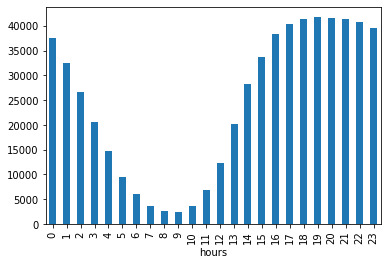

In [128]:
# Most frequent country code is 87.0 as per addr2 field. Plot graph for hours vs frequency count.
plot1 = merged_required[merged_required['addr2']==87.0]['hours'].value_counts().sort_index()
plot1.plot(kind='bar')
plt.xlabel('hours')

Most frequent country code in addr2 field is 87.0 which has 520481 entries. From the above graph, most of transactions are happening from evening to midnight(17th hour to 24rth hour). Waking hours might be around 10 in the morning as number of transactions started incresing from 10th hour. Sleeping hours can be around 3 to 9 as there're less number of transactions.

## Part 3 - Product Code

Text(0.5, 1, 'ProductCD Vs TransactionAmt')

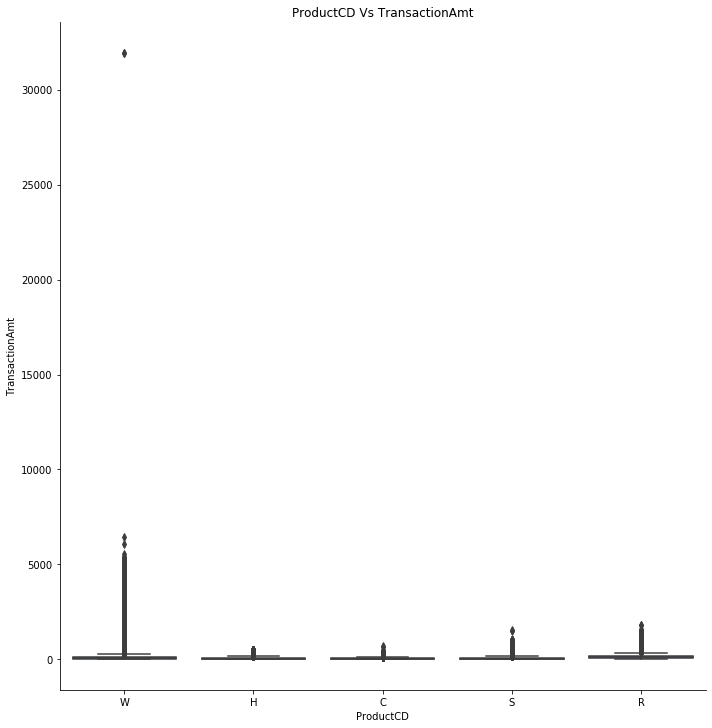

In [96]:
# Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x="ProductCD", y="TransactionAmt", hue="ProductCD",
            kind="box", dodge=False, data=merged_required, height=10)
plt.title('ProductCD Vs TransactionAmt')

In [25]:
w_mean = merged_required[merged_required['ProductCD'] == 'W']['TransactionAmt'].mean()
print('For ProductCD W: ',w_mean)
h_mean = merged_required[merged_required['ProductCD'] == 'H']['TransactionAmt'].mean()
print('For ProductCD H: ', h_mean)
c_mean = merged_required[merged_required['ProductCD'] == 'C']['TransactionAmt'].mean()
print('For ProductCD C: ',c_mean)
s_mean = merged_required[merged_required['ProductCD'] == 'S']['TransactionAmt'].mean()
print('For ProductCD S: ',s_mean)
r_mean = merged_required[merged_required['ProductCD'] == 'R']['TransactionAmt'].mean()
print('For ProductCD R: ',r_mean)

For ProductCD W:  153.15855385223293
For ProductCD H:  73.17005813953489
For ProductCD C:  42.872353113733446
For ProductCD S:  60.269487444100434
For ProductCD R:  168.30618849306347


From the above bar plot and calculation of mean, ProductCD 'R' and 'W' has most expensive products followed by H, S and C.

## Part 4 - Correlation Coefficient

In [101]:
np.corrcoef(merged_required['TransactionAmt'], merged_required['hours'])

array([[1.        , 0.04453236],
       [0.04453236, 1.        ]])

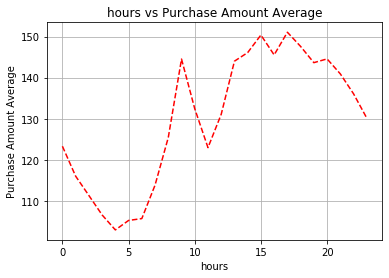

In [102]:
result_mean = merged_required['TransactionAmt'].groupby(merged_required['hours']).mean()
plt.plot(result_mean,'r--')
plt.xlabel('hours')
plt.ylabel('Purchase Amount Average')
plt.grid()
plt.title('hours vs Purchase Amount Average')
plt.show()

From the above plot, purchase amount is higher in the interval 14 hours to 17 hours and purchase amount is less between 3 to 7 hours. We can also assume those can be sleeping hours where purchase amount is less. 
Correlation coefficient for transaction amount and hours is 0.4453

## Part 5 - Interesting Plot

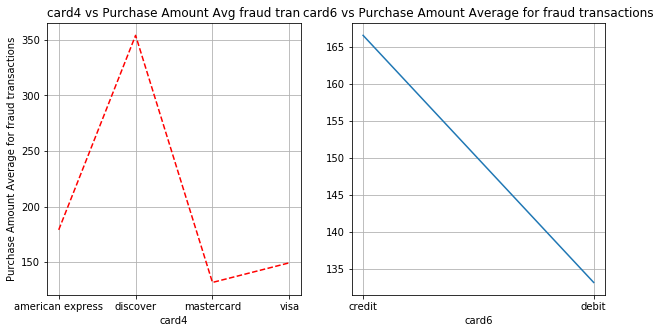

In [103]:
plt.figure(figsize=(10,5))
card4_mean = merged_required[merged_required['isFraud'] == 1]['TransactionAmt'].groupby(merged_required['card4']).mean()
card6_mean = merged_required[merged_required['isFraud'] == 1]['TransactionAmt'].groupby(merged_required['card6']).mean()
plt.subplot(1, 2, 1)
plt.plot(card4_mean,'r--')
plt.xlabel('card4')
plt.ylabel('Purchase Amount Average for fraud transactions')
plt.grid()
plt.title('card4 vs Purchase Amount Avg fraud tran')
plt.subplot(1, 2, 2)
plt.plot(card6_mean)
plt.xlabel('card6')
plt.grid()
plt.title('card6 vs Purchase Amount Average for fraud transactions')
plt.show()

Purchase amount average for fraud transactions is higher for discover card4 type and credit card of card6 type.

Text(0.5, 1.0, 'DeviceInfo vs Purchase Amount Avg for fraud tran')

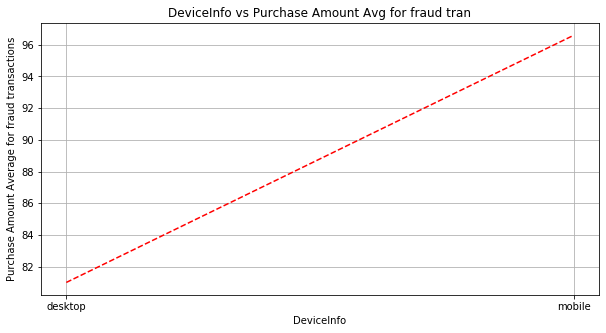

In [104]:
plt.figure(figsize=(10,5))
devicetype_mean = merged_required[merged_required['isFraud'] == 1]['TransactionAmt'].groupby(merged_required['DeviceType']).mean()
plt.plot(devicetype_mean,'r--')
plt.xlabel('DeviceInfo')
plt.ylabel('Purchase Amount Average for fraud transactions')
plt.grid()
plt.title('DeviceInfo vs Purchase Amount Avg for fraud tran')

Purchase amount average for fraud transactions is higher for mobile device type compared to transactions done by desktop.

## Part 6 - Prediction Model

1. Done outer join to merge on transaction id, so that 4,00,000 entries are not missed.
2. Observed number of non-null values in all available columns.
3. Dropped columns which have more than 80 % of NAN values. 'id_23','id_27'
4. NAN Handling of Numerical Data: Replaced NAN’s with median value of each column.
5. NAN Handling of Categorical Data: Replaced NAN’s with an alphabet for each column. 
6. Conversion of Categorical to Numerical: For features like: 'M1','M2','M3', 'M4', 'M5',  'M6','M7','M8','M9','ProductCD','card4','card6','DeviceType’,'id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38' : Label encoding is applied.
7. Split the training data to train and test with 80-20 ratio.
8. Baseline Model: Linear Regression with RMSE 0.163. Trained the model with train data and calculated RMSE with test data.
9. Applied Random Forest Regression
10. Applied XgBoost Regression

In [105]:
merged_required.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 436 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card1             590540 non-null int64
card2             581607 non-null float64
card3             588975 non-null float64
card4             588963 non-null object
card5             586281 non-null float64
card6             588969 non-null object
addr1             524834 non-null float64
addr2             524834 non-null float64
dist1             238269 non-null float64
dist2             37627 non-null float64
P_emaildomain     496084 non-null object
R_emaildomain     137291 non-null object
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
C4                590540 non-null float64
C5                59

In [106]:
merged_required.drop(['id_23','id_27','id_30','id_31','id_33','id_34'], axis = 1, inplace=True) 

In [107]:
dtype_groups = merged_required.columns.to_series().groupby(merged_required.dtypes).groups
dtype_groups

{dtype('int64'): Index(['TransactionID', 'isFraud', 'TransactionDT', 'card1', 'day', 'hours'], dtype='object'),
 dtype('float64'): Index(['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
        'dist2', 'C1', 'C2',
        ...
        'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
        'id_26', 'id_32'],
       dtype='object', length=399),
 dtype('O'): Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
        'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
        'id_16', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38',
        'DeviceType', 'DeviceInfo'],
       dtype='object')}

In [108]:
for k, v in dtype_groups.items():
    if (k.name == 'int64' or k.name == 'float64'):
        for eachVal in v:
            merged_required[eachVal].fillna(np.nanmedian(merged_required[eachVal]), inplace=True)

In [109]:
merged_required["ProductCD"].fillna("T", inplace = True)
merged_required["card4"].fillna("U", inplace = True)
merged_required["card6"].fillna("V", inplace = True)
merged_required["P_emaildomain"].fillna("B", inplace = True)
merged_required["R_emaildomain"].fillna("X", inplace = True)
merged_required["DeviceInfo"].fillna("Y", inplace = True)
merged_required["DeviceType"].fillna("Z", inplace = True)
merged_required["M1"].fillna("A", inplace = True)
merged_required["M2"].fillna("A", inplace = True)
merged_required["M3"].fillna("A", inplace = True)
merged_required["M4"].fillna("A", inplace = True)
merged_required["M5"].fillna("A", inplace = True)
merged_required["M6"].fillna("A", inplace = True)
merged_required["M7"].fillna("A", inplace = True)
merged_required["M8"].fillna("A", inplace = True)
merged_required["M9"].fillna("A", inplace = True)


merged_required["id_12"].fillna("D", inplace = True)
merged_required["id_15"].fillna("E", inplace = True)
merged_required["id_16"].fillna("D", inplace = True)
merged_required["id_28"].fillna("I", inplace = True)
merged_required["id_29"].fillna("J", inplace = True)
merged_required["id_35"].fillna("A", inplace = True)
merged_required["id_36"].fillna("A", inplace = True)
merged_required["id_37"].fillna("A", inplace = True)
merged_required["id_38"].fillna("A", inplace = True)


print(merged_required.head(5))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...     id_29  id_32  id_35  id_36  id_37  \
0  361.0  150.0    discover  142.0  ...         J   24.0      A      A      A   
1  404.0  150.0  mastercard  102.0  ...         J   24.0      A      A      A   
2  490.0  150.0        visa  166.0  ...         J   24.0      A      A      A   
3  567.0  150.0  mastercard  117.0  ...         J   24.0      A      A      A   
4  514.0  150.0  mastercard  102.0  ...  NotFound   32.0      T      F      T   

  id_38 DeviceType                     DeviceInfo 

In [110]:
#References: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()
for each_col in ['M1','M2','M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9','ProductCD','card4','card6','DeviceType',
                'id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38']:
    each_col_unique = np.unique(merged_required[each_col])
    each_col_labels = label_encod.fit_transform(merged_required[each_col])
    merged_required[each_col] = each_col_labels
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_29,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,hours
0,2987000,0,86400,68.5,4,13926,361.0,150.0,2,142.0,...,1,24.0,0,0,0,0,0,Y,2,0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,...,1,24.0,0,0,0,0,0,Y,2,0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,1,24.0,0,0,0,0,0,Y,2,0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,...,1,24.0,0,0,0,0,0,Y,2,0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,...,2,32.0,2,1,2,2,2,SAMSUNG SM-G892A Build/NRD90M,2,0


In [111]:
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_29,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,hours
0,2987000,0,86400,68.5,4,13926,361.0,150.0,2,142.0,...,1,24.0,0,0,0,0,0,Y,2,0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,...,1,24.0,0,0,0,0,0,Y,2,0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,1,24.0,0,0,0,0,0,Y,2,0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,...,1,24.0,0,0,0,0,0,Y,2,0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,...,2,32.0,2,1,2,2,2,SAMSUNG SM-G892A Build/NRD90M,2,0


In [112]:
# References: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(merged_required['P_emaildomain'])
hashed_features = hashed_features.toarray()
merged_required = pd.concat([merged_required, pd.DataFrame(hashed_features,columns = ['ped1','ped2','ped3','ped4','ped5','ped6'] 
          )],axis=1)
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,DeviceType,DeviceInfo,day,hours,ped1,ped2,ped3,ped4,ped5,ped6
0,2987000,0,86400,68.5,4,13926,361.0,150.0,2,142.0,...,0,Y,2,0,0.0,0.0,-1.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,...,0,Y,2,0,0.0,1.0,1.0,-1.0,2.0,-2.0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,0,Y,2,0,0.0,4.0,1.0,-1.0,2.0,-3.0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,...,0,Y,2,0,0.0,3.0,1.0,0.0,2.0,-3.0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,...,2,SAMSUNG SM-G892A Build/NRD90M,2,0,0.0,1.0,1.0,-1.0,2.0,-2.0


In [113]:
hashed_features = fh.fit_transform(merged_required['R_emaildomain'])
hashed_features = hashed_features.toarray()
merged_required = pd.concat([merged_required, pd.DataFrame(hashed_features,columns = ['red1','red2','red3','red4','red5','red6'] 
          )],axis=1)
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,ped3,ped4,ped5,ped6,red1,red2,red3,red4,red5,red6
0,2987000,0,86400,68.5,4,13926,361.0,150.0,2,142.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,...,1.0,-1.0,2.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,1.0,-1.0,2.0,-3.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,...,1.0,0.0,2.0,-3.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,...,1.0,-1.0,2.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [114]:
hashed_features = fh.fit_transform(merged_required['DeviceInfo'])
hashed_features = hashed_features.toarray()
merged_required = pd.concat([merged_required, pd.DataFrame(hashed_features,columns = ['devInfo1','devInfo2','devInfo3','devInfo4','devInfo5','devInfo6'] 
          )],axis=1)
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,red3,red4,red5,red6,devInfo1,devInfo2,devInfo3,devInfo4,devInfo5,devInfo6
0,2987000,0,86400,68.5,4,13926,361.0,150.0,2,142.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,...,1.0,0.0,0.0,0.0,-3.0,-1.0,3.0,3.0,5.0,0.0


In [115]:
y_train = merged_required[['isFraud']]

In [116]:
merged_required.drop(['P_emaildomain','R_emaildomain','DeviceInfo','TransactionDT','isFraud'], axis = 1, inplace=True) 

In [117]:
merged_required.shape

(590540, 443)

In [118]:
# References: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(merged_required, y_train, test_size = 0.2, random_state = 0)

In [119]:
# baseline model - linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression().fit(xTrain, yTrain)
y_prediction = model.predict(xTest)
RMSE = np.sqrt(metrics.mean_squared_error(yTest, y_prediction))
RMSE

0.1620350459752219

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth = 22,n_jobs = -1)
rf_model.fit(xTrain, yTrain)
y_pred = rf_model.predict(xTest)

In [ ]:
# References: https://xgboost.readthedocs.io/en/latest/
import xgboost as xgb
xgb_model = xgb.XGBRegressor(        
                 learning_rate=0.06,
                 max_depth=20,
                 colsample_bytree=0.4,
                 n_estimators=100,                                                                    
                 subsample=0.6,
                 n_jobs = -1)
xgb_model.fit(xTrain,yTrain)
y_pred = xgb_model.predict(xTest)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yTest, y_pred)

ROC score: 0.9498469076100613

In [120]:
test_trans= pd.read_csv("test_transaction.csv") 
test_ident = pd.read_csv("test_identity.csv")

merged_test = pd.merge(test_trans, test_ident, on='TransactionID', how='outer')

In [121]:
merged_test['day'] = pd.to_datetime(merged_test['TransactionDT'], unit='s').dt.day
merged_test['hours'] = pd.to_datetime(merged_test['TransactionDT'], unit='s').dt.hour

In [122]:
merged_test.drop(['id_23','id_27','id_30','id_31','id_33','id_34'], axis = 1, inplace=True)
group = merged_test.columns.to_series().groupby(merged_test.dtypes).groups
for k, v in group.items():
    if (k.name == 'int64' or k.name == 'float64'):
        for eachVal in v:
            merged_test[eachVal].fillna(np.nanmedian(merged_test[eachVal]), inplace=True)

In [123]:
merged_test["ProductCD"].fillna("T", inplace = True)
merged_test["card4"].fillna("U", inplace = True)
merged_test["card6"].fillna("V", inplace = True)
merged_test["P_emaildomain"].fillna("B", inplace = True)
merged_test["R_emaildomain"].fillna("X", inplace = True)
merged_test["DeviceInfo"].fillna("Y", inplace = True)
merged_test["DeviceType"].fillna("Z", inplace = True)
merged_test["M1"].fillna("A", inplace = True)
merged_test["M2"].fillna("A", inplace = True)
merged_test["M3"].fillna("A", inplace = True)
merged_test["M4"].fillna("A", inplace = True)
merged_test["M5"].fillna("A", inplace = True)
merged_test["M6"].fillna("A", inplace = True)
merged_test["M7"].fillna("A", inplace = True)
merged_test["M8"].fillna("A", inplace = True)
merged_test["M9"].fillna("A", inplace = True)


merged_test["id_12"].fillna("D", inplace = True)
merged_test["id_15"].fillna("E", inplace = True)
merged_test["id_16"].fillna("D", inplace = True)
merged_test["id_28"].fillna("I", inplace = True)
merged_test["id_29"].fillna("J", inplace = True)
merged_test["id_35"].fillna("A", inplace = True)
merged_test["id_36"].fillna("A", inplace = True)
merged_test["id_37"].fillna("A", inplace = True)
merged_test["id_38"].fillna("A", inplace = True)


from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()
for each_col in ['M1','M2','M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9','ProductCD','card4','card6','DeviceType',
                'id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38']:
    each_col_unique = np.unique(merged_test[each_col])
    each_col_labels = label_encod.fit_transform(merged_test[each_col])
    merged_test[each_col] = each_col_labels
merged_test.head(5)



,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_29,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,hours
0,3663549,18403224,31.95,4,10409,111.0,150.0,4,226.0,3,...,1,24.0,0,0,0,0,0,Y,2,0
1,3663550,18403263,49.00,4,4272,111.0,150.0,4,226.0,3,...,1,24.0,0,0,0,0,0,Y,2,0
2,3663551,18403310,171.00,4,4476,574.0,150.0,4,226.0,3,...,1,24.0,0,0,0,0,0,Y,2,0
3,3663552,18403310,284.95,4,10989,360.0,150.0,4,166.0,3,...,1,24.0,0,0,0,0,0,Y,2,0
4,3663553,18403317,67.95,4,18018,452.0,150.0,3,117.0,3,...,1,24.0,0,0,0,0,0,Y,2,0


In [124]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(merged_test['P_emaildomain'])
hashed_features = hashed_features.toarray()
merged_test = pd.concat([merged_test, pd.DataFrame(hashed_features,columns = ['ped1','ped2','ped3','ped4','ped5','ped6'] 
          )],axis=1)
#merged_test.head(5)

hashed_features = fh.fit_transform(merged_test['R_emaildomain'])
hashed_features = hashed_features.toarray()
merged_test = pd.concat([merged_test, pd.DataFrame(hashed_features,columns = ['red1','red2','red3','red4','red5','red6'] 
          )],axis=1)
#merged_required.head(5)

hashed_features = fh.fit_transform(merged_test['DeviceInfo'])
hashed_features = hashed_features.toarray()
merged_test = pd.concat([merged_test, pd.DataFrame(hashed_features,columns = ['devInfo1','devInfo2','devInfo3','devInfo4','devInfo5','devInfo6'] 
          )],axis=1)

merged_test.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,red3,red4,red5,red6,devInfo1,devInfo2,devInfo3,devInfo4,devInfo5,devInfo6
0,3663549,18403224,31.95,4,10409,111.0,150.0,4,226.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,3663550,18403263,49.00,4,4272,111.0,150.0,4,226.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,3663551,18403310,171.00,4,4476,574.0,150.0,4,226.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
3,3663552,18403310,284.95,4,10989,360.0,150.0,4,166.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,3663553,18403317,67.95,4,18018,452.0,150.0,3,117.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [125]:
merged_test.drop(['P_emaildomain','R_emaildomain','DeviceInfo','TransactionDT'], axis = 1, inplace=True)

In [126]:
merged_test.head(5)

,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,red3,red4,red5,red6,devInfo1,devInfo2,devInfo3,devInfo4,devInfo5,devInfo6
0,3663549,31.95,4,10409,111.0,150.0,4,226.0,3,170.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,3663550,49.00,4,4272,111.0,150.0,4,226.0,3,299.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,3663551,171.00,4,4476,574.0,150.0,4,226.0,3,472.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
3,3663552,284.95,4,10989,360.0,150.0,4,166.0,3,205.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,3663553,67.95,4,18018,452.0,150.0,3,117.0,3,264.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [127]:
#Baseline model using Linear Regression
y_prediction_test = model.predict(merged_test)

In [ ]:
# Using Xgboost Regressor
y_prediction_test = xgb_model.predict(merged_test)

In [ ]:
y_predict_test_df = pd.DataFrame(y_prediction_test, columns=['isFraud'])
y_predict_test_df.head(5)

In [ ]:
final_df= pd.DataFrame(data={'TransactionID':merged_test['TransactionID'],'isFraud':y_predict_test_df['isFraud']})

In [ ]:
final_df.to_csv('submissionxg1.csv', index=False)

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/meghanavemulapalli

Highest Rank: 4842

Score: 0.8971

Number of entries: 7

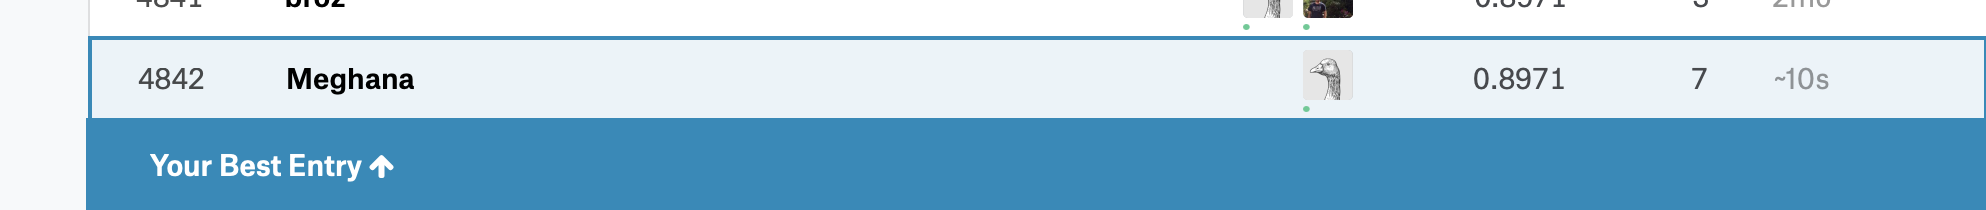